In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def adjust_brightness(img, brightness):
    # Đảm bảo rằng giá trị brightness là một số
    brightness = float(brightness)
    
    # Chuyển đổi hình ảnh
    img_array = np.array(img)
    
    # Thêm độ sáng cho từng kênh màu (R, G, B) của hình ảnh
    adjusted_img = img_array + brightness
    
    # Giới hạn các giá trị pixel trong khoảng từ 0 đến 255
    adjusted_img = np.clip(adjusted_img, 0, 255)
    
    # Đảm bảo rằng nó nằm trong khoảng từ 0 đến 255
    adjusted_img = adjusted_img.astype(np.uint8)
    
    return adjusted_img

In [3]:
def adjust_contrast(image, factor):
    np_image = np.array(image)

    # Adjust the contrast of each color channel (RGB) using the formula:
    # new_value = (value - min_value) * factor + min_value
    for channel in range(3):  # 3 represents the number of color channels (R, G, B)
        min_value = np.min(np_image[:, :, channel])
        adjusted_np_image_channel = ((np_image[:, :, channel] - min_value) * factor) + min_value
        np_image[:, :, channel] = np.clip(adjusted_np_image_channel, 0, 255)

    # Convert the array back to a PIL.Image object
    adjusted_image = Image.fromarray(np.uint8(np_image))

    return adjusted_image

In [4]:
def rgb_to_gray(rgb_image):
    #Tính trung bình của các kênh R, G và B
    r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
    gray_image = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray_image.astype(np.uint8)

In [5]:
def rgb_to_sepia(rgb_image):
    # Chuyển đổi ảnh RGB thành ảnh sepia bằng cách áp dụng công thức biến đổi sepia
    r, g, b = rgb_image[:, :, 0], rgb_image[:, :, 1], rgb_image[:, :, 2]
    sepia_r = (0.393 * r) + (0.769 * g) + (0.189 * b)
    sepia_g = (0.349 * r) + (0.686 * g) + (0.168 * b)
    sepia_b = (0.272 * r) + (0.534 * g) + (0.131 * b)

    # Giới hạn các giá trị pixel trong khoảng từ 0 đến 255
    sepia_r = np.clip(sepia_r, 0, 255)
    sepia_g = np.clip(sepia_g, 0, 255)
    sepia_b = np.clip(sepia_b, 0, 255)

    # Tạo ảnh sepia từ các kênh R, G, B đã tính toán
    sepia_image = np.stack((sepia_r, sepia_g, sepia_b), axis=-1)
    return sepia_image.astype(np.uint8)

In [6]:
def apply_filter(image, kernel):
    # Lấy kích thước của ảnh và kernel
    image_height, image_width = image.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]

    # Tạo một ma trận chứa kết quả sau khi áp dụng bộ lọc
    result = np.zeros((image_height, image_width), dtype=np.uint8)

    # Áp dụng bộ lọc thông qua phép tích chập
    for y in range(image_height):
        for x in range(image_width):
            # Lấy phần của ảnh mà kernel đè lên
            image_patch = image[y:y+kernel_height, x:x+kernel_width]

            # Kiểm tra xem kernel và phần của ảnh có cùng kích thước
            if image_patch.shape[:2] == kernel.shape[:2]:
                # Áp dụng phép tích chập
                filtered_value = np.sum(image_patch * kernel)

                # Gán giá trị lọc vào ma trận kết quả
                result[y, x] = filtered_value

    return result

In [7]:
def blur_image(image, kernel_size):
    # Tạo bộ lọc trung bình có kích thước kernel_size x kernel_size
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

    # Áp dụng bộ lọc để làm mờ ảnh
    blurred_image = apply_filter(image, kernel)

    return blurred_image

In [8]:
def gaussian_kernel(kernel_size, sigma=1.0):
    kernel = np.fromfunction(lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x - kernel_size//2)**2 + (y - kernel_size//2)**2) / (2*sigma**2)), (kernel_size, kernel_size))
    kernel /= np.sum(kernel)
    return kernel

In [9]:
def sharpen_image(image, kernel_size):
    # Tạo bộ lọc sắc nét
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    kernel[kernel_size // 2, kernel_size // 2] = 2.0
    kernel -= np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)

    # Áp dụng bộ lọc để làm sắc nét ảnh
    sharpened_image = apply_filter(image, kernel)

    return sharpened_image

In [10]:
def crop_center_image(image, target_width, target_height):
    # Chuyển đổi hình ảnh thành mảng NumPy
    image_array = np.array(image)

    # Lấy chiều cao và chiều rộng của hình ảnh ban đầu
    original_height, original_width = image_array.shape[:2]

    # Tính toán các chỉ số cắt
    start_x = (original_width - target_width) // 2
    start_y = (original_height - target_height) // 2
    end_x = start_x + target_width
    end_y = start_y + target_height

    # Cắt ảnh theo vị trí đã tính toán
    cropped_image = image_array[start_y:end_y, start_x:end_x]

    return Image.fromarray(cropped_image)

In [11]:
def crop_circular_image(image):
    # Chuyển đổi ảnh
    img_array = np.array(image)

    # Kích thước ảnh
    height, width = img_array.shape[:2]

    # Tính tâm của ảnh
    center_x, center_y = width // 2, height // 2

    # Tính bán kính của hình tròn (chọn bán kính nhỏ hơn nửa kích thước ảnh)
    radius = min(center_x, center_y)

    # Tạo mặt nạ hình tròn
    Y, X = np.ogrid[:height, :width]
    mask = (X - center_x) ** 2 + (Y - center_y) ** 2 <= radius ** 2

    # Áp dụng mặt nạ để cắt ảnh theo hình tròn
    cropped_image = np.zeros_like(img_array)
    cropped_image[mask] = img_array[mask]

    return cropped_image

In [12]:
def flip_horizontal(image):
    # Chuyển đổi ảnh 
    img_array = np.array(image)

    # Đảo ngược theo trục dọc (lật ngang)
    flipped_img = np.flipud(img_array)

    return flipped_img

In [13]:
def flip_vertical(image):
    # Chuyển đổi ảnh 
    img_array = np.array(image)

    # Đảo ngược theo trục ngang (lật dọc)
    flipped_img = np.fliplr(img_array)

    return flipped_img

In [14]:
def crop_ellipse(image, angle=45):
    # Chuyển đổi ảnh 
    img_array = np.array(image)

    # Kích thước ảnh
    height, width = img_array.shape[:2]

    # Tính tâm của ảnh
    center_x, center_y = width // 2, height // 2

    # Tạo mặt nạ elip có dạng elip chéo
    Y, X = np.ogrid[:height, :width]
    mask_ellipse = (
        ((X - center_x) / (width // 4)) ** 2 + ((Y - center_y) / (height // 2)) ** 2 <= 1
    ) | (
        ((X - center_x) / (width // 2)) ** 2 + ((Y - center_y) / (height // 4)) ** 2 <= 1
    )

    # Xoay trục của elip
    angle_rad = np.radians(angle)
    cos_a = np.cos(angle_rad)
    sin_a = np.sin(angle_rad)
    rotated_ellipse_mask = np.zeros_like(mask_ellipse)

    for i in range(height):
        for j in range(width):
            x = center_x - j
            y = center_y - i
            new_x = int(round(center_x + x * cos_a - y * sin_a))
            new_y = int(round(center_y + x * sin_a + y * cos_a))
            if 0 <= new_x < width and 0 <= new_y < height:
                rotated_ellipse_mask[i, j] = mask_ellipse[new_y, new_x]

    # Áp dụng mặt nạ để cắt ảnh theo dạng elip chéo như cánh bướm
    cropped_image = np.zeros_like(img_array)
    cropped_image[rotated_ellipse_mask] = img_array[rotated_ellipse_mask]

    return cropped_image

In [15]:
def main():
    input_file = input("Enter the image filename: ")

    try:
        img = Image.open(input_file)
    except FileNotFoundError:
        print("Error: Image file not found.")
        return
    img_copy = img.copy()

    filename, extension = input_file.split('.')

    while True:
        print("\nMenu:")
        print("0: Process all functions and save images")
        print("1: Adjust brightness and save the image")
        print("2: Adjust contrast and save the image")
        print("3: Flip the image horizontally/vertically and save it")
        print("4: Convert RGB to grayscale and sepia and save images")
        print("5: Blur and sharpen the image and save images")
        print("6: Crop the image (center) and save it")
        print("7: Crop the image in a circular region and save it")
        print("8: Crop the image in an elliptical region and save it")
        print("9: Exit")
        choice = input("Enter your choice (0-9): ")
        if choice == '0':
            # Create the first figure with 8 rows and 2 columns
            plt.figure(figsize=(10, 40))

            # Show the original image
            plt.subplot(8, 2, 1)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Adjust brightness of the image
            brightness = 50
            adjusted_img_brightness = adjust_brightness(img_copy, brightness)

            # Show the adjusted image (brightness)
            plt.subplot(8, 2, 2)
            plt.imshow(adjusted_img_brightness)
            plt.title("Brightness Adjusted Image")
            plt.axis("off")

            # Adjust contrast of the original image
            contrast = 2.0
            adjusted_img_contrast = adjust_contrast(img_copy, contrast)

            # Show the original image
            plt.subplot(8, 2, 3)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the adjusted image (contrast)
            plt.subplot(8, 2, 4)
            plt.imshow(adjusted_img_contrast)
            plt.title("Contrast Adjusted Image")
            plt.axis("off")

            # Convert the original image to grayscale
            gray_image = rgb_to_gray(np.array(img_copy))

            # Show the original image
            plt.subplot(8, 2, 5)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the grayscale image
            plt.subplot(8, 2, 6)
            plt.imshow(gray_image, cmap='gray')
            plt.title("Grayscale Image")
            plt.axis("off")

            # Convert the original image to sepia
            sepia_image = rgb_to_sepia(np.array(img_copy))

            # Show the original image
            plt.subplot(8, 2, 7)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the sepia image
            plt.subplot(8, 2, 8)
            plt.imshow(sepia_image)
            plt.title("Sepia Image")
            plt.axis("off")

            # Convert the grayscale image to a blurred grayscale image
            blurred_gray_image = blur_image(gray_image, kernel_size=5)

            # Show the grayscale image
            plt.subplot(8, 2, 9)
            plt.imshow(gray_image, cmap='gray')
            plt.title("Grayscale Image")
            plt.axis("off")

            # Show the blurred grayscale image
            plt.subplot(8, 2, 10)
            plt.imshow(blurred_gray_image, cmap='gray')
            plt.title("Blurred Grayscale Image")
            plt.axis("off")
            
            # Show the layout with the images
            plt.tight_layout()
            plt.show()

            # Sharpen the blurred grayscale image using a 5x5 kernel
            sharpened_blurred_gray_image = sharpen_image(blurred_gray_image, kernel_size=5)

            # Create the second figure with 8 rows and 2 columns
            plt.figure(figsize=(10, 40))

            # Show the blurred grayscale image
            plt.subplot(8, 2, 1)
            plt.imshow(blurred_gray_image, cmap='gray')
            plt.title("Blurred Grayscale Image")
            plt.axis("off")

            # Show the sharpened blurred grayscale image
            plt.subplot(8, 2, 2)
            plt.imshow(sharpened_blurred_gray_image, cmap='gray')
            plt.title("Sharpened Blurred Grayscale Image")
            plt.axis("off")

            # Crop the center of the image to size 200x200
            cropped_image = crop_center_image(img_copy, target_width=200, target_height=200)

            # Show the original image
            plt.subplot(8, 2, 3)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the cropped image
            plt.subplot(8, 2, 4)
            plt.imshow(cropped_image)
            plt.title("Cropped Image (200x200)")
            plt.axis("off")

            # Crop the circular region from the image
            cropped_circular_image = crop_circular_image(img_copy)

            # Show the original image
            plt.subplot(8, 2, 5)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the cropped circular image
            plt.subplot(8, 2, 6)
            plt.imshow(cropped_circular_image)
            plt.title("Cropped Circular Image")
            plt.axis("off")
            
            # Crop the elliptical region from the image
            cropped_ellipse_image = crop_ellipse(img_copy)

            # Show the original image
            plt.subplot(8, 2, 7)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the cropped elliptical image
            plt.subplot(8, 2, 8)
            plt.imshow(cropped_ellipse_image)
            plt.title("Cropped Elliptical Image")
            plt.axis("off")

            # Show the original image
            plt.subplot(8, 2, 9)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Flip the image horizontally
            flipped_horizontal_image = flip_horizontal(img)

            # Show the flipped image (horizontal)
            plt.subplot(8, 2, 10)
            plt.imshow(flipped_horizontal_image)
            plt.title("Flipped Horizontal Image")
            plt.axis("off")

            # Flip the image vertically
            flipped_vertical_image = flip_vertical(img)

            # Show the flipped image (vertical)
            plt.subplot(8, 2, 11)
            plt.imshow(flipped_vertical_image)
            plt.title("Flipped Vertical Image")
            plt.axis("off")

            # Show the layout with the images
            plt.tight_layout()
            plt.show()

            # Save the adjusted images as files

            output_filename_brightness = f"{filename}_brightness_{int(brightness)}.{extension}"
            output_filename_contrast = f"{filename}_contrast_{int(contrast * 100)}.{extension}"
            output_filename_gray = f"{filename}_gray.{extension}"
            output_filename_blurred_gray = f"{filename}_blurred_gray.{extension}"
            output_filename_sharpened_blurred_gray = f"{filename}_sharpened_blurred_gray.{extension}"
            output_filename_sepia = f"{filename}_sepia.{extension}"
            output_filename_cropped = f"{filename}_cropped_200x200.{extension}"
            output_filename_flipped_horizontal = f"{filename}_flipped_horizontal.{extension}"
            output_filename_flipped_vertical = f"{filename}_flipped_vertical.{extension}"
            output_filename_cropped_circular = f"{filename}_cropped_circular.{extension}"
            output_filename_cropped_elipse = f"{filename}_cropped_elipse.{extension}"
            

            plt.imsave(output_filename_brightness, np.array(adjusted_img_brightness))
            plt.imsave(output_filename_contrast, np.array(adjusted_img_contrast))
            plt.imsave(output_filename_gray, gray_image, cmap='gray')
            plt.imsave(output_filename_blurred_gray, blurred_gray_image, cmap='gray')
            plt.imsave(output_filename_sharpened_blurred_gray, sharpened_blurred_gray_image, cmap='gray')
            plt.imsave(output_filename_sepia, sepia_image)
            plt.imsave(output_filename_cropped, np.array(cropped_image))
            plt.imsave(output_filename_flipped_horizontal, np.array(flipped_horizontal_image))
            plt.imsave(output_filename_flipped_vertical, np.array(flipped_vertical_image))
            plt.imsave(output_filename_cropped_circular, cropped_circular_image)
            plt.imsave(output_filename_cropped_elipse, cropped_ellipse_image)

        elif choice == '1':
            # Show the original image
            plt.subplot(1, 2, 1)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Adjust brightness of the image
            brightness = 50
            adjusted_img_brightness = adjust_brightness(img_copy, brightness)

            # Show the adjusted image (brightness)
            plt.subplot(1, 2, 2)
            plt.imshow(adjusted_img_brightness)
            plt.title("Brightness Adjusted Image")
            plt.axis("off")

            # Show the layout with the images
            plt.tight_layout()
            plt.show()

            output_filename_brightness = f"{filename}_brightness_{int(brightness)}.{extension}"

            plt.imsave(output_filename_brightness, np.array(adjusted_img_brightness))

        elif choice == '2':
            # Adjust contrast of the original image
            contrast = 2.0
            adjusted_img_contrast = adjust_contrast(img_copy, contrast)

            # Show the original image
            plt.subplot(1, 2, 1)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the adjusted image (contrast)
            plt.subplot(1, 2, 2)
            plt.imshow(adjusted_img_contrast)
            plt.title("Contrast Adjusted Image")
            plt.axis("off")

             # Show the layout with the images
            plt.tight_layout()
            plt.show()

            output_filename_contrast = f"{filename}_contrast_{int(contrast * 100)}.{extension}"
            plt.imsave(output_filename_contrast, np.array(adjusted_img_contrast))

        elif choice == '3':
            # Flip the image horizontally
            flipped_horizontal_image = flip_horizontal(img)
            
            # Show the original image
            plt.subplot(1, 3, 1)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the flipped image (horizontal)
            plt.subplot(1, 3, 2)
            plt.imshow(flipped_horizontal_image)
            plt.title("Flipped Horizontal Image")
            plt.axis("off")

            # Flip the image vertically
            flipped_vertical_image = flip_vertical(img)

            # Show the flipped image (vertical)
            plt.subplot(1, 3, 3)
            plt.imshow(flipped_vertical_image)
            plt.title("Flipped Vertical Image")
            plt.axis("off")

            # Show the layout with the images
            plt.tight_layout()
            plt.show()

            output_filename_flipped_horizontal = f"{filename}_flipped_horizontal.{extension}"
            output_filename_flipped_vertical = f"{filename}_flipped_vertical.{extension}"

            plt.imsave(output_filename_flipped_horizontal, np.array(flipped_horizontal_image))
            plt.imsave(output_filename_flipped_vertical, np.array(flipped_vertical_image))

        elif choice == '4':
             # Convert the original image to grayscale
            gray_image = rgb_to_gray(np.array(img_copy))

            # Show the original image
            plt.subplot(1, 3, 1)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the grayscale image
            plt.subplot(1, 3, 2)
            plt.imshow(gray_image, cmap='gray')
            plt.title("Grayscale Image")
            plt.axis("off")

            # Convert the original image to sepia
            sepia_image = rgb_to_sepia(np.array(img_copy))

            # Show the original image
            plt.subplot(1, 3, 3)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the sepia image
            plt.figure(figsize=(10, 5))  # Create a new figure to display only the sepia image
            plt.imshow(sepia_image)
            plt.title("Sepia Image")
            plt.axis("off")

             # Show the layout with the images
            plt.tight_layout()
            plt.show()

            # Save the images
            filename, extension = input_file.split('.')
            output_filename_gray = f"{filename}_gray.{extension}"
            output_filename_sepia = f"{filename}_sepia.{extension}"

            plt.imsave(output_filename_gray, gray_image, cmap='gray')
            plt.imsave(output_filename_sepia, sepia_image)

        elif choice=='5':
            # Convert the original image to grayscale
            gray_image = rgb_to_gray(np.array(img_copy))

            # Convert the grayscale image to a blurred grayscale image
            blurred_gray_image = blur_image(gray_image, kernel_size=5)

            # Sharpen the blurred grayscale image using a 5x5 kernel
            sharpened_blurred_gray_image = sharpen_image(blurred_gray_image, kernel_size=5)

            # Show the grayscale image
            plt.subplot(1, 3, 1)
            plt.imshow(gray_image, cmap='gray')
            plt.title("Grayscale Image")
            plt.axis("off")

            # Show the blurred grayscale image
            plt.subplot(1, 3, 2)
            plt.imshow(blurred_gray_image, cmap='gray')
            plt.title("Blurred Grayscale Image")
            plt.axis("off")
            
            # Show the sharpened blurred grayscale image
            plt.subplot(1, 3, 3)
            plt.imshow(sharpened_blurred_gray_image, cmap='gray')
            plt.title("Sharpened Blurred Grayscale Image")
            plt.axis("off")

            # Show the layout with the images
            plt.tight_layout()
            plt.show()

            output_filename_gray = f"{filename}_gray.{extension}"
            output_filename_blurred_gray = f"{filename}_blurred_gray.{extension}"
            output_filename_sharpened_blurred_gray = f"{filename}_sharpened_blurred_gray.{extension}"

            plt.imsave(output_filename_gray, gray_image, cmap='gray')
            plt.imsave(output_filename_blurred_gray, blurred_gray_image, cmap='gray')
            plt.imsave(output_filename_sharpened_blurred_gray, sharpened_blurred_gray_image, cmap='gray')

        elif choice == '6':
            # Crop the center of the image to size 200x200
            cropped_image = crop_center_image(img_copy, target_width=200, target_height=200)

            # Show the original image
            plt.subplot(1, 2, 1)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the cropped image
            plt.subplot(1, 2, 2)
            plt.imshow(cropped_image)
            plt.title("Cropped Image (200x200)")
            plt.axis("off")

             # Show the layout with the images
            plt.tight_layout()
            plt.show()

            output_filename_cropped = f"{filename}_cropped_200x200.{extension}"

        elif choice =='7':
            # Crop the circular region from the image
            cropped_circular_image = crop_circular_image(img_copy)

            # Show the original image
            plt.subplot(1, 2, 1)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the cropped circular image
            plt.subplot(1, 2, 2)
            plt.imshow(cropped_circular_image)
            plt.title("Cropped Circular Image")
            plt.axis("off")

            # Show the layout with the images
            plt.tight_layout()
            plt.show()

            output_filename_cropped_circular = f"{filename}_cropped_circular.{extension}"
            plt.imsave(output_filename_cropped_circular, cropped_circular_image)
            
        
        elif choice =='8':
            # Crop the elliptical region from the image
            cropped_ellipse_image = crop_ellipse(img_copy)

            # Show the original image
            plt.subplot(1, 2, 1)
            plt.imshow(img)
            plt.title("Original Image")
            plt.axis("off")

            # Show the cropped elliptical image
            plt.subplot(1, 2, 2)
            plt.imshow(cropped_ellipse_image)
            plt.title("Cropped Elliptical Image")
            plt.axis("off")

            # Show the layout with the images
            plt.tight_layout()
            plt.show()

            output_filename_cropped_elipse = f"{filename}_cropped_elipse.{extension}"
            plt.imsave(output_filename_cropped_elipse, cropped_ellipse_image)

        elif choice == '9':
            break

        else:
            print("Invalid choice. Please enter a valid option (0-9).")


Enter the image filename: man.jpg

Menu:
0: Process all functions and save images
1: Adjust brightness and save the image
2: Adjust contrast and save the image
3: Flip the image horizontally/vertically and save it
4: Convert RGB to grayscale and sepia and save images
5: Blur and sharpen the image and save images
6: Crop the image (center) and save it
7: Crop the image in a circular region and save it
8: Crop the image in an elliptical region and save it
9: Exit
Enter your choice (0-9): 0


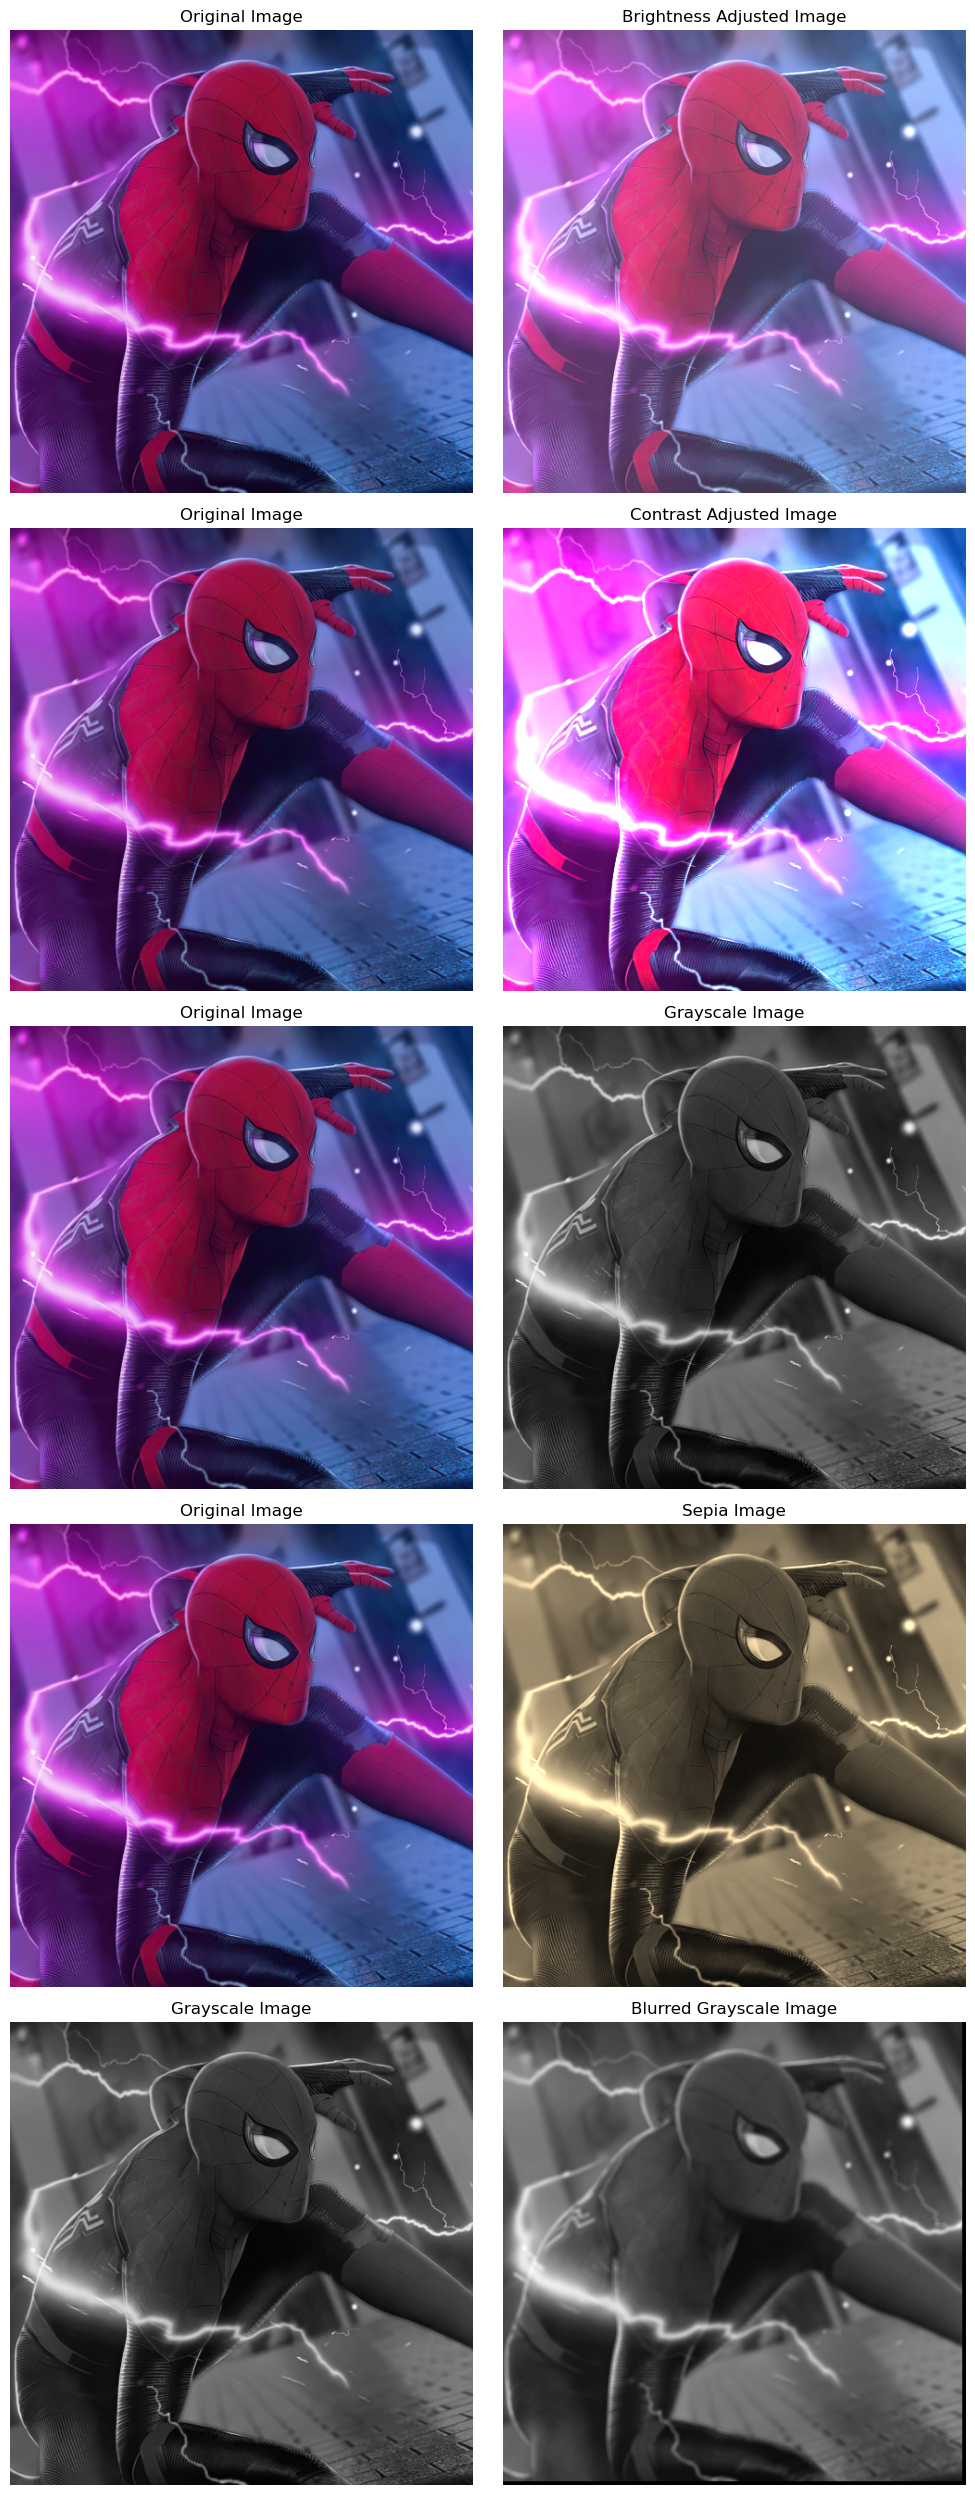

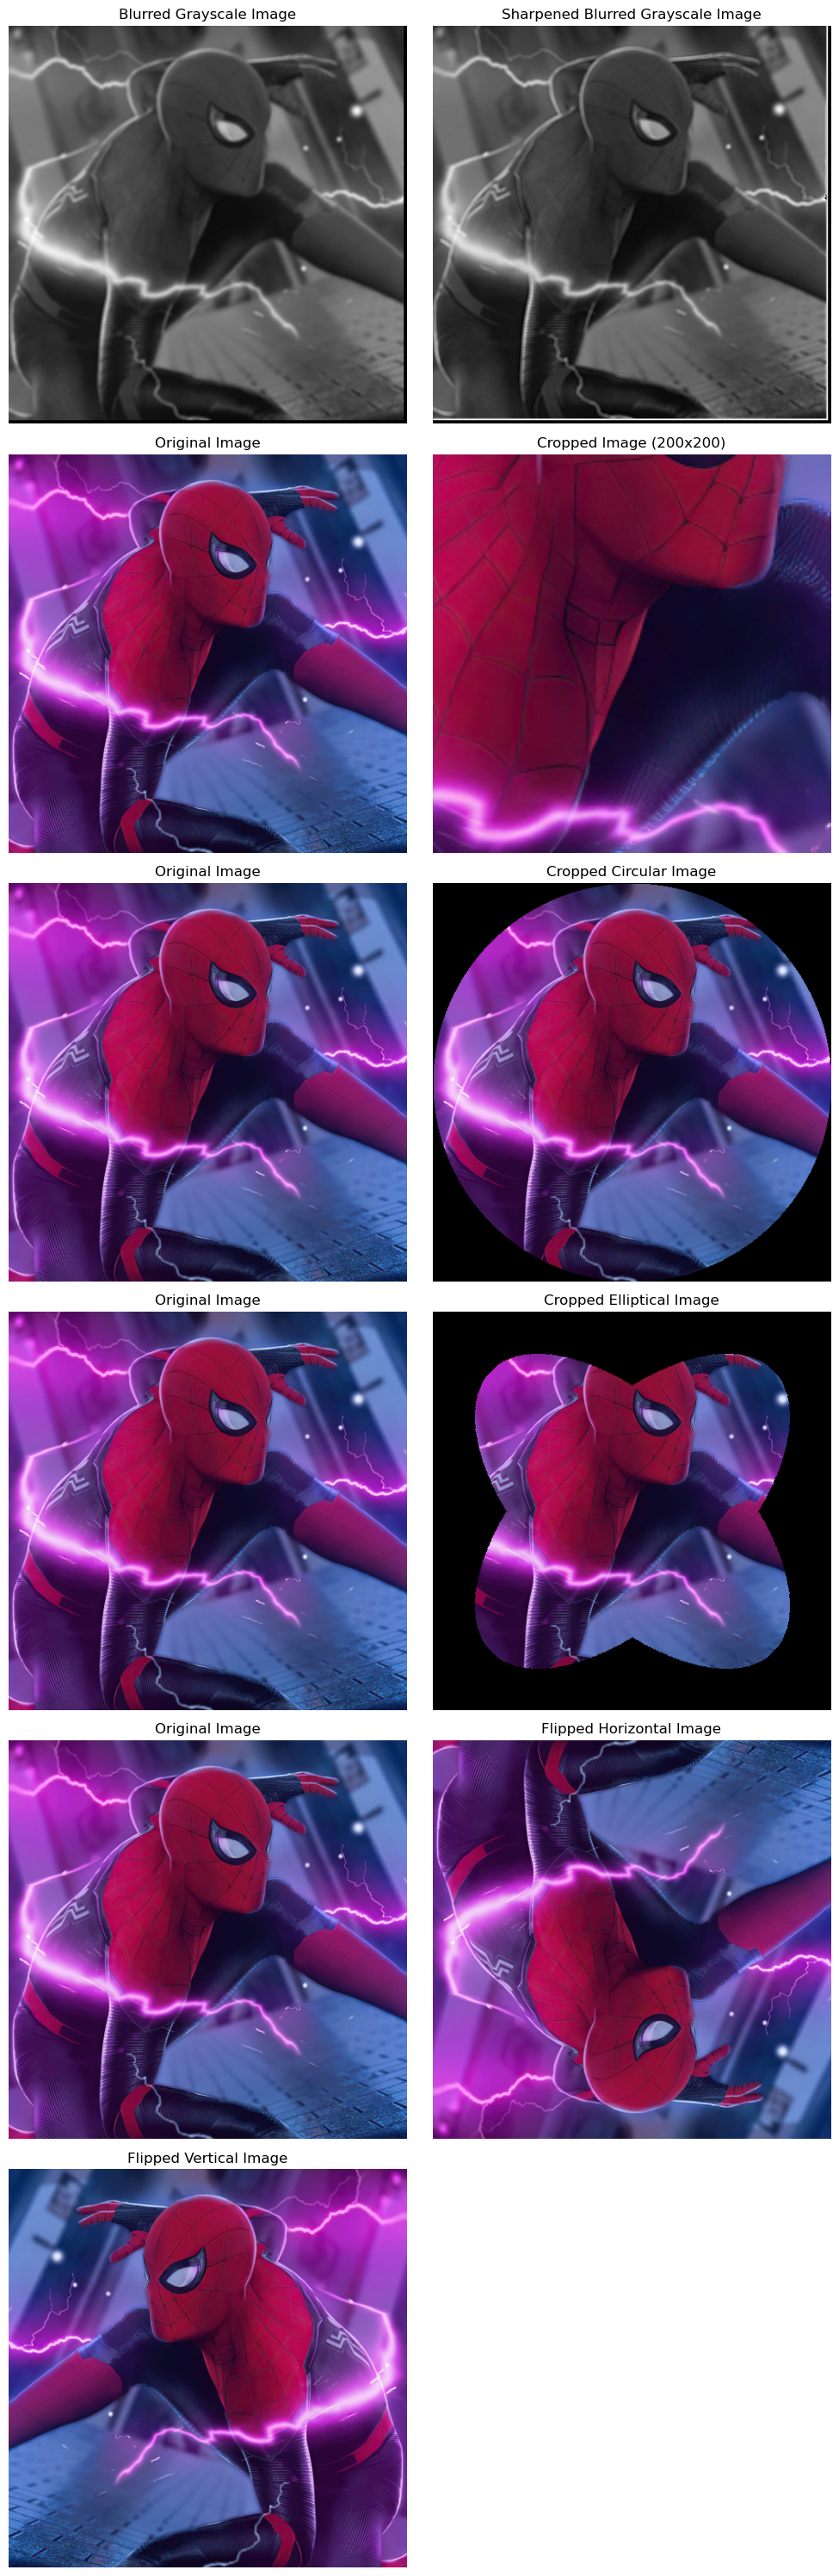


Menu:
0: Process all functions and save images
1: Adjust brightness and save the image
2: Adjust contrast and save the image
3: Flip the image horizontally/vertically and save it
4: Convert RGB to grayscale and sepia and save images
5: Blur and sharpen the image and save images
6: Crop the image (center) and save it
7: Crop the image in a circular region and save it
8: Crop the image in an elliptical region and save it
9: Exit


In [ ]:
if __name__ == "__main__":
    main()